In [30]:
import deepchem as dc
import pandas as pd

df = pd.read_csv('ci_smiles_ml.csv')
smiles = [str(x).upper() for x in df['SMILES']]

rdkit_featurizer = dc.feat.RDKitDescriptors()
features = rdkit_featurizer(smiles)

df_featurized = pd.DataFrame(features, columns=rdkit_featurizer.descriptors)
df_featurized['SMILES'] = smiles
df_featurized['CorrosionRate'] = df['CorrosionRate']

In [31]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import mean_squared_error

X = df_featurized[rdkit_featurizer.descriptors]

output= 'CorrosionRate'
y = df_featurized[output]


rf = RandomForestRegressor()
rf.fit(X, y)
y_pred = cross_val_predict(rf, X, y, cv=5)
df_featurized[output+'_pred'] = y_pred
rmse = round(mean_squared_error(y, y_pred, squared=False), 3)
print(rmse)



0.105


/Users/cborg/.pyenv/versions/3.11.2/lib/python3.11/site-packages/sklearn/metrics/_regression.py:483: FutureWarning:

'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.



In [32]:
import plotly.express as px
import plotly.graph_objects as go

fig = px.scatter(df_featurized, x=output, y=output+'_pred')
fig.add_trace(go.Scatter(x=[0,1.5], y=[0,1.5],mode='lines'))
fig.update_traces(marker={'size': 12, 'line_width':2, 'line_color':'DarkSlateGrey'})
fig.update_layout(height=400, width=400, showlegend=False, font_family='inter', font_size=14)

fig.update_xaxes(title_font_family="Inter")

fig.add_annotation(x=0.5, y=1.5,
            text="RMSE: {}".format(rmse),
            showarrow=False,
            arrowhead=1)

fig.show()

In [37]:
from sklearn.manifold import TSNE

X = df_featurized[rdkit_featurizer.descriptors]
result = TSNE(n_components=2,perplexity=5, n_iter=1000).fit_transform(X)

df_featurized['X1'] = [x[0] for x in result]
df_featurized['X2'] = [x[1] for x in result]
df_featurized['ID'] = df['ID']
df_featurized['Group'] = df['Group']


import plotly.express as px
fig = px.scatter(df_featurized, x="X1", y="X2", hover_name='ID', color='Group', template='plotly_white')
fig.update_layout(height=600, width=700,)
fig.update_layout(showlegend=False, font_family='inter', font_size=20)

fig.update_traces(marker=dict(size=12,
                              line=dict(width=2,
                                        color='DarkSlateGrey')),
                  selector=dict(mode='markers'))

# fig.update(layout_coloraxis_showscale=False)

fig.show()

In [94]:
from pysmilesutils.augment import SMILESAugmenter
augmenter = SMILESAugmenter()
new_smiles = augmenter(["C1=CC2=NNN=C2C=C1"]*10)
print(new_smiles)
features = rdkit_featurizer(new_smiles)
df_new = pd.DataFrame(features, columns=rdkit_featurizer.descriptors)
df_new

['n1c2ccccc2n[nH]1', 'c1c2n[nH]nc2ccc1', 'c1cc2n[nH]nc2cc1', 'n1c2ccccc2n[nH]1', 'c1cc2n[nH]nc2cc1', 'n1[nH]nc2ccccc12', 'c12c(n[nH]n1)cccc2', 'c12ccccc1n[nH]n2', 'c1cc2n[nH]nc2cc1', 'n1c2c(cccc2)n[nH]1']


,MaxAbsEStateIndex,MaxEStateIndex,MinAbsEStateIndex,MinEStateIndex,qed,SPS,MolWt,HeavyAtomMolWt,ExactMolWt,NumValenceElectrons,...,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
0,3.882593,3.882593,0.914352,0.914352,0.560736,10.222222,119.127,114.087,119.048347,44.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,3.882593,3.882593,0.914352,0.914352,0.560736,10.222222,119.127,114.087,119.048347,44.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3.882593,3.882593,0.914352,0.914352,0.560736,10.222222,119.127,114.087,119.048347,44.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3.882593,3.882593,0.914352,0.914352,0.560736,10.222222,119.127,114.087,119.048347,44.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,3.882593,3.882593,0.914352,0.914352,0.560736,10.222222,119.127,114.087,119.048347,44.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,3.882593,3.882593,0.914352,0.914352,0.560736,10.222222,119.127,114.087,119.048347,44.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,3.882593,3.882593,0.914352,0.914352,0.560736,10.222222,119.127,114.087,119.048347,44.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,3.882593,3.882593,0.914352,0.914352,0.560736,10.222222,119.127,114.087,119.048347,44.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,3.882593,3.882593,0.914352,0.914352,0.560736,10.222222,119.127,114.087,119.048347,44.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,3.882593,3.882593,0.914352,0.914352,0.560736,10.222222,119.127,114.087,119.048347,44.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


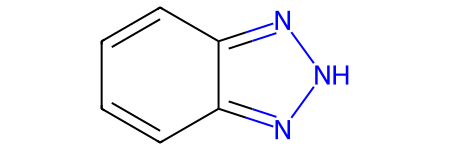

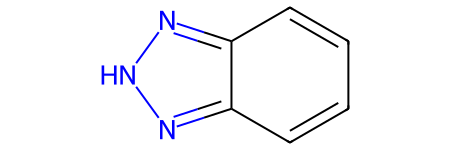

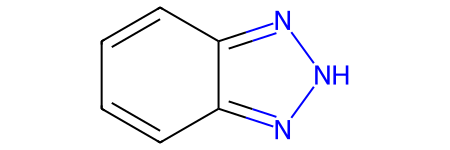

In [68]:
from rdkit import Chem
from rdkit.Chem import Draw
new_smiles = augmenter(["C1=CC2=NNN=C2C=C1"]*3)


for ns in new_smiles:
    mol = Chem.MolFromSmiles(ns)
    display(mol)

In [101]:
from rdkit import Chem

starting_smiles = 'C1=CC2=NNN=C2C=C1'


def replace_element(starting_smiles, element_to_replace):

    mol = Chem.MolFromSmiles(starting_smiles)

    replacements = ['O', 'C', 'F', 'S', 'N']
    replacements = [x for x in replacements if x != element_to_replace]

    all_new_smiles = []
    for ele in replacements:
        replacement = Chem.MolFromSmiles(ele)
        modified_mol = Chem.ReplaceSubstructs(mol, Chem.MolFromSmiles(element_to_replace), replacement)
        new_smiles = [Chem.MolToSmiles(mol) for mol in modified_mol]
        all_new_smiles.extend(new_smiles)
    
    return all_new_smiles
    


replacements = ['O', 'C', 'F', 'S', 'N']

all_new_smiles = []
for ele in replacements:
    all_new_smiles.extend(replace_element('C1=CC2=NNN=C2C=C1', ele))
all_new_smiles

['c1ccc2n[nH]nc2c1',
 'c1ccc2n[nH]nc2c1',
 'c1ccc2n[nH]nc2c1',
 'c1ccc2n[nH]nc2c1',
 'c1cc2n[nH]nc2co1',
 'c1coc2n[nH]nc2c1',
 'c1cco2n[nH]nc2c1',
 'c1cco2n[nH]nc2c1',
 'c1coc2n[nH]nc2c1',
 'c1cc2n[nH]nc2co1',
 'c1cc2n[nH]nc2cf1',
 'c1cfc2n[nH]nc2c1',
 'c1ccf2n[nH]nc2c1',
 'c1ccf2n[nH]nc2c1',
 'c1cfc2n[nH]nc2c1',
 'c1cc2n[nH]nc2cf1',
 'c1cc2n[nH]nc2cs1',
 'c1csc2n[nH]nc2c1',
 'c1ccs2n[nH]nc2c1',
 'c1ccs2n[nH]nc2c1',
 'c1csc2n[nH]nc2c1',
 'c1cc2n[nH]nc2cs1',
 'c1cc2n[nH]nc2cn1',
 'c1cnc2n[nH]nc2c1',
 'c1ccn2n[nH]nc2c1',
 'c1ccn2n[nH]nc2c1',
 'c1cnc2n[nH]nc2c1',
 'c1cc2n[nH]nc2cn1',
 'c1ccc2n[nH]nc2c1',
 'c1ccc2n[nH]nc2c1',
 'c1ccc2n[nH]nc2c1',
 'c1ccc2n[nH]nc2c1',
 'c1ccc2n[nH]nc2c1',
 'c1ccc2n[nH]nc2c1',
 'c1ccc2n[nH]nc2c1',
 'c1ccc2n[nH]nc2c1',
 'c1ccc2o[nH]nc2c1',
 'c1ccc2nonc2c1',
 'c1ccc2o[nH]nc2c1',
 'c1ccc2n[nH]cc2c1',
 'c1ccc2ncnc2c1',
 'c1ccc2n[nH]cc2c1',
 'c1ccc2f[nH]nc2c1',
 'c1ccc2nfnc2c1',
 'c1ccc2f[nH]nc2c1',
 'c1ccc2s[nH]nc2c1',
 'c1ccc2nsnc2c1',
 'c1ccc2s[nH]nc2c1']

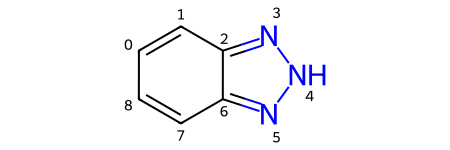

In [103]:
mol = Chem.MolFromSmiles('C1=CC2=NNN=C2C=C1')
mol

In [110]:
all_new_smiles=['CC', 'CCC']
y_pred_new = [1, 2]
data = {'SMILES':smiles, 'Predicted Corrosion Rate (mpy)':y_pred_new}
df_new = pd.DataFrame(data)
df_new


,SMILES,Predicted Corrosion Rate (mpy)
0,[CH2],1
1,[CH2],2
